### Data analytics
    Measument_summary.csv 파일은 서울시의 25개 구별 관측소에서 측정한 오염물질의 농도를 1시간 단위로 측정한 데이터(샘플기간: 2017년~2019년, 3년간) 이다. 다음을 실행하는 파이썬 코드를 작성하시오.

    Latitude 위도
    Longitude 경도


### 1번
    1.	Address 컬럼의 값을 구이름으로 변경하시오. 
    (예를 들어 19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea → Jongno-gu)


In [173]:
import pandas as pd
from datetime import datetime
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import warnings

In [3]:
pollution_df = pd.read_csv('./Measurement_summary.csv')

In [4]:
pollution_df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [5]:
pollution_df.tail()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0
647510,2019-12-31 23:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.037,0.005,0.5,27.0,18.0


In [6]:
pollution_df['Address'] = pollution_df['Address'].map(lambda x : x.split(',')[2])

In [7]:
pollution_df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,Jongno-gu,37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,Jongno-gu,37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [8]:
pollution_df.tail()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647506,2019-12-31 19:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0
647510,2019-12-31 23:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.037,0.005,0.5,27.0,18.0


### 2번
    2.	각각의 오염물질에 대해 전체 기간과 각 연도별로 구분하여 각 관측소에 대한 평균 농도를 아래와 같이 계산하고, 농도가 가장 높은 구와 가장 낮은 구를 구하시오.
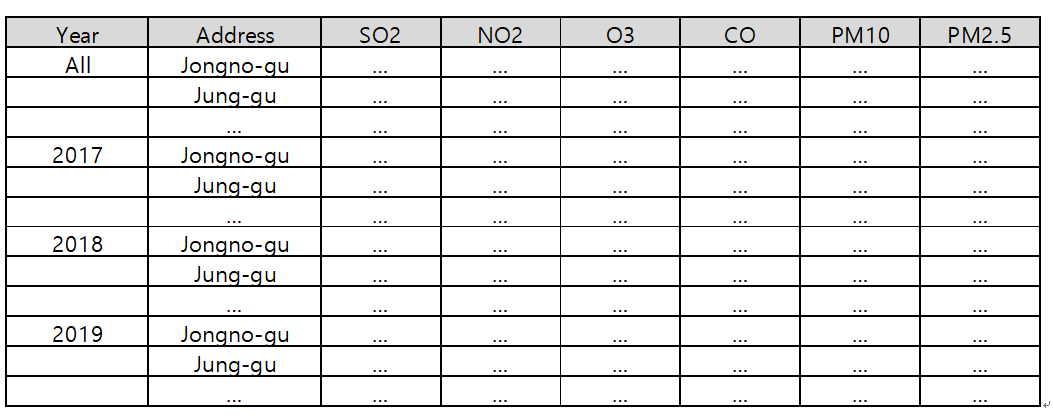

In [9]:
pollution_copy = pollution_df.copy()

In [10]:
pollution_copy

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,Jongno-gu,37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,Jongno-gu,37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


In [11]:
pollution_copy['Measurement date'] = pollution_copy['Measurement date'].map(lambda x : x[0:4])

In [12]:
pollution_copy2 = pollution_copy.set_index(['Measurement date', 'Address'])

In [13]:
pollution_copy3 = pollution_copy2.groupby(['Measurement date', 'Address']).mean()

In [14]:
pollution_copy3.head()

Station code   Latitude   Longitude  \
Measurement date Address                                               
2017              Dobong-gu               113  37.654192  127.029088   
                  Dongdaemun-gu           109  37.575743  127.028885   
                  Dongjak-gu              120  37.480917  126.971481   
                  Eunpyeong-gu            104  37.609823  126.934848   
                  Gangbuk-gu              112  37.647930  127.011952   

                                      SO2       NO2        O3        CO  \
Measurement date Address                                                  
2017              Dobong-gu      0.000969  0.022159  0.023401  0.556107   
                  Dongdaemun-gu  0.004911  0.029278  0.021417  0.484269   
                  Dongjak-gu     0.003228  0.030476  0.026389  0.476473   
                  Eunpyeong-gu  -0.000658  0.020616  0.021826  0.570913   
                  Gangbuk-gu     0.002865  0.023151  0.026188  0.470719   

                                      PM10      PM2.5  
Measurement date Address                               
2017              Dobong-gu      43.206393  23.501941  
                  Dongdaemun-gu  43.740068  22.387100  
                  Dongjak-gu     42.223174  25.429566  
                  Eunpyeong-gu   43.206164  23.190753  
                  Gangbuk-gu     36.982078  21.959247

In [15]:
pollution_copy4 = pollution_copy3.drop(pollution_copy3.columns[0:3], axis = 'columns')

In [16]:
pollution_copy4

SO2       NO2        O3        CO  \
Measurement date Address                                                    
2017              Dobong-gu        0.000969  0.022159  0.023401  0.556107   
                  Dongdaemun-gu    0.004911  0.029278  0.021417  0.484269   
                  Dongjak-gu       0.003228  0.030476  0.026389  0.476473   
                  Eunpyeong-gu    -0.000658  0.020616  0.021826  0.570913   
                  Gangbuk-gu       0.002865  0.023151  0.026188  0.470719   
...                                     ...       ...       ...       ...   
2019              Seongdong-gu     0.003708  0.031333  0.023143  0.520607   
                  Songpa-gu        0.001882  0.031384  0.021041  0.544782   
                  Yangcheon-gu     0.003731  0.030591  0.022557  0.534423   
                  Yeongdeungpo-gu  0.003541  0.031001  0.022761  0.496119   
                  Yongsan-gu       0.002635  0.031088  0.022352  0.493058   

                                        PM10      PM2.5  
Measurement date Address                                 
2017              Dobong-gu        43.206393  23.501941  
                  Dongdaemun-gu    43.740068  22.387100  
                  Dongjak-gu       42.223174  25.429566  
                  Eunpyeong-gu     43.206164  23.190753  
                  Gangbuk-gu       36.982078  21.959247  
...                                      ...        ...  
2019              Seongdong-gu     58.941465  27.712818  
                  Songpa-gu        50.886583  26.589982  
                  Yangcheon-gu     47.495587  26.002863  
                  Yeongdeungpo-gu  50.326009  37.326248  
                  Yongsan-gu       33.933802  23.619871  

[75 rows x 6 columns]

In [17]:
pollution__copy = pollution_df.copy()

In [18]:
pollution__copy

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,Jongno-gu,37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,Jongno-gu,37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


In [19]:
pollution__copy['Measurement date'] = 'All'

In [20]:
pollution__copy2 = pollution__copy.set_index(['Measurement date', 'Address'])

In [21]:
pollution__copy3 = pollution__copy2.groupby(['Measurement date', 'Address']).mean()

In [22]:
pollution__copy4 = pollution__copy3.drop(pollution_copy3.columns[0:3], axis = 'columns')

In [23]:
final_df = pd.concat([pollution__copy4, pollution_copy4])

In [24]:
final_df

SO2       NO2        O3        CO  \
Measurement date Address                                                    
All               Dobong-gu        0.000913  0.018949  0.023604  0.572814   
                  Dongdaemun-gu   -0.014647  0.009495  0.002446  0.490542   
                  Dongjak-gu      -0.000509  0.027914  0.022945  0.470626   
                  Eunpyeong-gu    -0.010560  0.009730  0.012924  0.526560   
                  Gangbuk-gu       0.002712  0.021196  0.027543  0.462328   
...                                     ...       ...       ...       ...   
2019              Seongdong-gu     0.003708  0.031333  0.023143  0.520607   
                  Songpa-gu        0.001882  0.031384  0.021041  0.544782   
                  Yangcheon-gu     0.003731  0.030591  0.022557  0.534423   
                  Yeongdeungpo-gu  0.003541  0.031001  0.022761  0.496119   
                  Yongsan-gu       0.002635  0.031088  0.022352  0.493058   

                                        PM10      PM2.5  
Measurement date Address                                 
All               Dobong-gu        43.294415  25.733277  
                  Dongdaemun-gu    38.269958  22.692596  
                  Dongjak-gu       41.655441  24.373021  
                  Eunpyeong-gu     42.328468  24.890639  
                  Gangbuk-gu       38.830643  21.726093  
...                                      ...        ...  
2019              Seongdong-gu     58.941465  27.712818  
                  Songpa-gu        50.886583  26.589982  
                  Yangcheon-gu     47.495587  26.002863  
                  Yeongdeungpo-gu  50.326009  37.326248  
                  Yongsan-gu       33.933802  23.619871  

[100 rows x 6 columns]

In [25]:
final_df.mean()

SO2      -0.001858
NO2       0.022447
O3        0.017921
CO        0.509269
PM10     43.722986
PM2.5    25.436393
dtype: float64

In [26]:
final_df

SO2       NO2        O3        CO  \
Measurement date Address                                                    
All               Dobong-gu        0.000913  0.018949  0.023604  0.572814   
                  Dongdaemun-gu   -0.014647  0.009495  0.002446  0.490542   
                  Dongjak-gu      -0.000509  0.027914  0.022945  0.470626   
                  Eunpyeong-gu    -0.010560  0.009730  0.012924  0.526560   
                  Gangbuk-gu       0.002712  0.021196  0.027543  0.462328   
...                                     ...       ...       ...       ...   
2019              Seongdong-gu     0.003708  0.031333  0.023143  0.520607   
                  Songpa-gu        0.001882  0.031384  0.021041  0.544782   
                  Yangcheon-gu     0.003731  0.030591  0.022557  0.534423   
                  Yeongdeungpo-gu  0.003541  0.031001  0.022761  0.496119   
                  Yongsan-gu       0.002635  0.031088  0.022352  0.493058   

                                        PM10      PM2.5  
Measurement date Address                                 
All               Dobong-gu        43.294415  25.733277  
                  Dongdaemun-gu    38.269958  22.692596  
                  Dongjak-gu       41.655441  24.373021  
                  Eunpyeong-gu     42.328468  24.890639  
                  Gangbuk-gu       38.830643  21.726093  
...                                      ...        ...  
2019              Seongdong-gu     58.941465  27.712818  
                  Songpa-gu        50.886583  26.589982  
                  Yangcheon-gu     47.495587  26.002863  
                  Yeongdeungpo-gu  50.326009  37.326248  
                  Yongsan-gu       33.933802  23.619871  

[100 rows x 6 columns]

In [27]:
pollutant_list = final_df.columns.to_list()
year_list = ['All', '2017', '2018', '2019']

max_SO2 = []
max_NO2 = []
max_O3 = []
max_CO = []
max_PM10 = []
max_PM2_5 = [] 

for pollutant in pollutant_list :
    if pollutant == 'SO2' :
        for year in year_list :
            max_SO2.append(final_df[pollutant][year].idxmax())
    if pollutant == 'NO2' : 
        for year in year_list :
            max_NO2.append(final_df[pollutant][year].idxmax())
    if pollutant == 'O3' : 
        for year in year_list :
            max_O3.append(final_df[pollutant][year].idxmax())
    if pollutant == 'CO' : 
        for year in year_list :
            max_CO.append(final_df[pollutant][year].idxmax())
    if pollutant == 'PM10' : 
        for year in year_list :
            max_PM10.append(final_df[pollutant][year].idxmax())
    if pollutant == 'PM2.5' : 
        for year in year_list :
            max_PM2_5.append(final_df[pollutant][year].idxmax())


max_df = pd.DataFrame( index = year_list )

max_df['max_SO2'] = max_SO2
max_df['max_NO2'] = max_NO2
max_df['max_O3'] = max_O3
max_df['max_CO'] = max_CO
max_df['max_PM10'] = max_PM10
max_df['max_PM2_5'] = max_PM2_5

In [28]:
max_df

,max_SO2,max_NO2,max_O3,max_CO,max_PM10,max_PM2_5
All,Yeongdeungpo-gu,Jung-gu,Gangbuk-gu,Seongbuk-gu,Gangseo-gu,Yeongdeungpo-gu
2017,Guro-gu,Jung-gu,Nowon-gu,Yeongdeungpo-gu,Gangseo-gu,Yangcheon-gu
2018,Dongdaemun-gu,Guro-gu,Gangbuk-gu,Seongbuk-gu,Seocho-gu,Yeongdeungpo-gu
2019,Guro-gu,Seongbuk-gu,Guro-gu,Seodaemun-gu,Guro-gu,Guro-gu


In [29]:
pollutant_list = final_df.columns.to_list()
year_list = ['All', '2017', '2018', '2019']

min_SO2 = []
min_NO2 = []
min_O3 = []
min_CO = []
min_PM10 = []
min_PM2_5 = [] 

for pollutant in pollutant_list :
    if pollutant == 'SO2' :
        for year in year_list :
            min_SO2.append(final_df[pollutant][year].idxmin())
    if pollutant == 'NO2' : 
        for year in year_list :
            min_NO2.append(final_df[pollutant][year].idxmin())
    if pollutant == 'O3' : 
        for year in year_list :
            min_O3.append(final_df[pollutant][year].idxmin())
    if pollutant == 'CO' : 
        for year in year_list :
            min_CO.append(final_df[pollutant][year].idxmin())
    if pollutant == 'PM10' : 
        for year in year_list :
            min_PM10.append(final_df[pollutant][year].idxmin())
    if pollutant == 'PM2.5' : 
        for year in year_list :
            min_PM2_5.append(final_df[pollutant][year].idxmin())

min_df = pd.DataFrame( index = year_list )

min_df['min_SO2'] = min_SO2
min_df['min_NO2'] = min_NO2
min_df['min_O3'] = min_O3
min_df['min_CO'] = min_CO
min_df['min_PM10'] = min_PM10
min_df['min_PM2_5'] = min_PM2_5

In [30]:
min_df

,min_SO2,min_NO2,min_O3,min_CO,min_PM10,min_PM2_5
All,Seodaemun-gu,Seodaemun-gu,Mapo-gu,Guro-gu,Yongsan-gu,Gangbuk-gu
2017,Gangseo-gu,Gangseo-gu,Gangseo-gu,Yongsan-gu,Gangbuk-gu,Gangbuk-gu
2018,Seodaemun-gu,Seodaemun-gu,Seodaemun-gu,Guro-gu,Yongsan-gu,Gangbuk-gu
2019,Mapo-gu,Mapo-gu,Mapo-gu,Guro-gu,Jungnang-gu,Jungnang-gu


In [31]:
result = pd.concat([max_df, min_df],axis=1)

In [32]:
result

,max_SO2,max_NO2,max_O3,max_CO,max_PM10,max_PM2_5,min_SO2,min_NO2,min_O3,min_CO,min_PM10,min_PM2_5
All,Yeongdeungpo-gu,Jung-gu,Gangbuk-gu,Seongbuk-gu,Gangseo-gu,Yeongdeungpo-gu,Seodaemun-gu,Seodaemun-gu,Mapo-gu,Guro-gu,Yongsan-gu,Gangbuk-gu
2017,Guro-gu,Jung-gu,Nowon-gu,Yeongdeungpo-gu,Gangseo-gu,Yangcheon-gu,Gangseo-gu,Gangseo-gu,Gangseo-gu,Yongsan-gu,Gangbuk-gu,Gangbuk-gu
2018,Dongdaemun-gu,Guro-gu,Gangbuk-gu,Seongbuk-gu,Seocho-gu,Yeongdeungpo-gu,Seodaemun-gu,Seodaemun-gu,Seodaemun-gu,Guro-gu,Yongsan-gu,Gangbuk-gu
2019,Guro-gu,Seongbuk-gu,Guro-gu,Seodaemun-gu,Guro-gu,Guro-gu,Mapo-gu,Mapo-gu,Mapo-gu,Guro-gu,Jungnang-gu,Jungnang-gu


### 3번
    3.	데이터에 포함된 6가지 오염물질의 농도 각각에 대해 날짜별로 해당일 측정치의 평균을 다음과 같이 구하고, 이를 이용해서 다음에 답하시오.
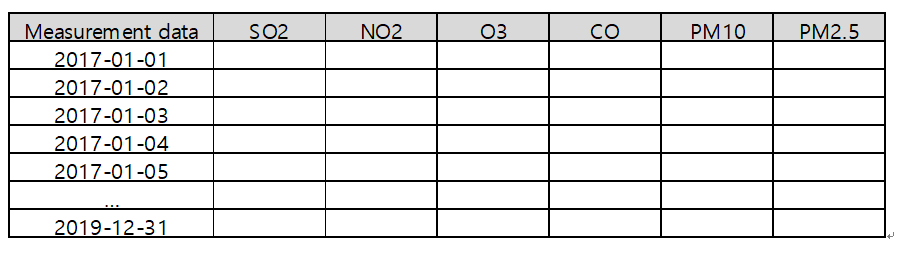


In [33]:
Q3_df = pollution_df.copy()

In [34]:
Q3_df2 = Q3_df.drop(Q3_df.columns[1:5], axis='columns')

In [135]:
Q3_df2

,SO2,NO2,O3,CO,PM10,PM2.5
Measurement date,,,,,,
2017-01-01 00:00:00,0.004,0.059,0.002,1.2,73.0,57.0
2017-01-01 01:00:00,0.004,0.058,0.002,1.2,71.0,59.0
2017-01-01 02:00:00,0.004,0.056,0.002,1.2,70.0,59.0
2017-01-01 03:00:00,0.004,0.056,0.002,1.2,70.0,58.0
2017-01-01 04:00:00,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...
2019-12-31 19:00:00,0.003,0.028,0.013,0.5,23.0,17.0
2019-12-31 20:00:00,0.003,0.025,0.015,0.4,25.0,19.0
2019-12-31 21:00:00,0.003,0.023,0.015,0.4,24.0,17.0


In [36]:
Q3_df2['Measurement date'] = pd.to_datetime(Q3_df2['Measurement date'])

In [37]:
Q3_df2.index = Q3_df2['Measurement date']

In [38]:
Q3_df2.pop('Measurement date')

Measurement date
2017-01-01 00:00:00   2017-01-01 00:00:00
2017-01-01 01:00:00   2017-01-01 01:00:00
2017-01-01 02:00:00   2017-01-01 02:00:00
2017-01-01 03:00:00   2017-01-01 03:00:00
2017-01-01 04:00:00   2017-01-01 04:00:00
                              ...        
2019-12-31 19:00:00   2019-12-31 19:00:00
2019-12-31 20:00:00   2019-12-31 20:00:00
2019-12-31 21:00:00   2019-12-31 21:00:00
2019-12-31 22:00:00   2019-12-31 22:00:00
2019-12-31 23:00:00   2019-12-31 23:00:00
Name: Measurement date, Length: 647511, dtype: datetime64[ns]

In [39]:
Q3_df3 = Q3_df2.resample('d').mean()

In [40]:
Q3_df4 = Q3_df3.dropna()

In [41]:
Q3_df4

,SO2,NO2,O3,CO,PM10,PM2.5
Measurement date,,,,,,
2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333
...,...,...,...,...,...,...
2019-12-27,0.003433,0.028083,0.018195,0.556500,34.030000,24.853333
2019-12-28,0.003710,0.043712,0.005945,0.677167,42.831667,25.313333
2019-12-29,0.003337,0.037145,0.008980,0.641333,44.428333,27.306667


    A.	평균 농도의 일간 변화를 꺽은선그래프로 표시하시오. (각 오염물질 별로 값의 스케일에 차이가 있으므로 정규화한 값을 이용해 그래프로 표시하시오.) 이 때, x축의 label은 날짜가 되도록 하시오.


In [42]:
Q3_df5 = Q3_df4.apply(zscore)

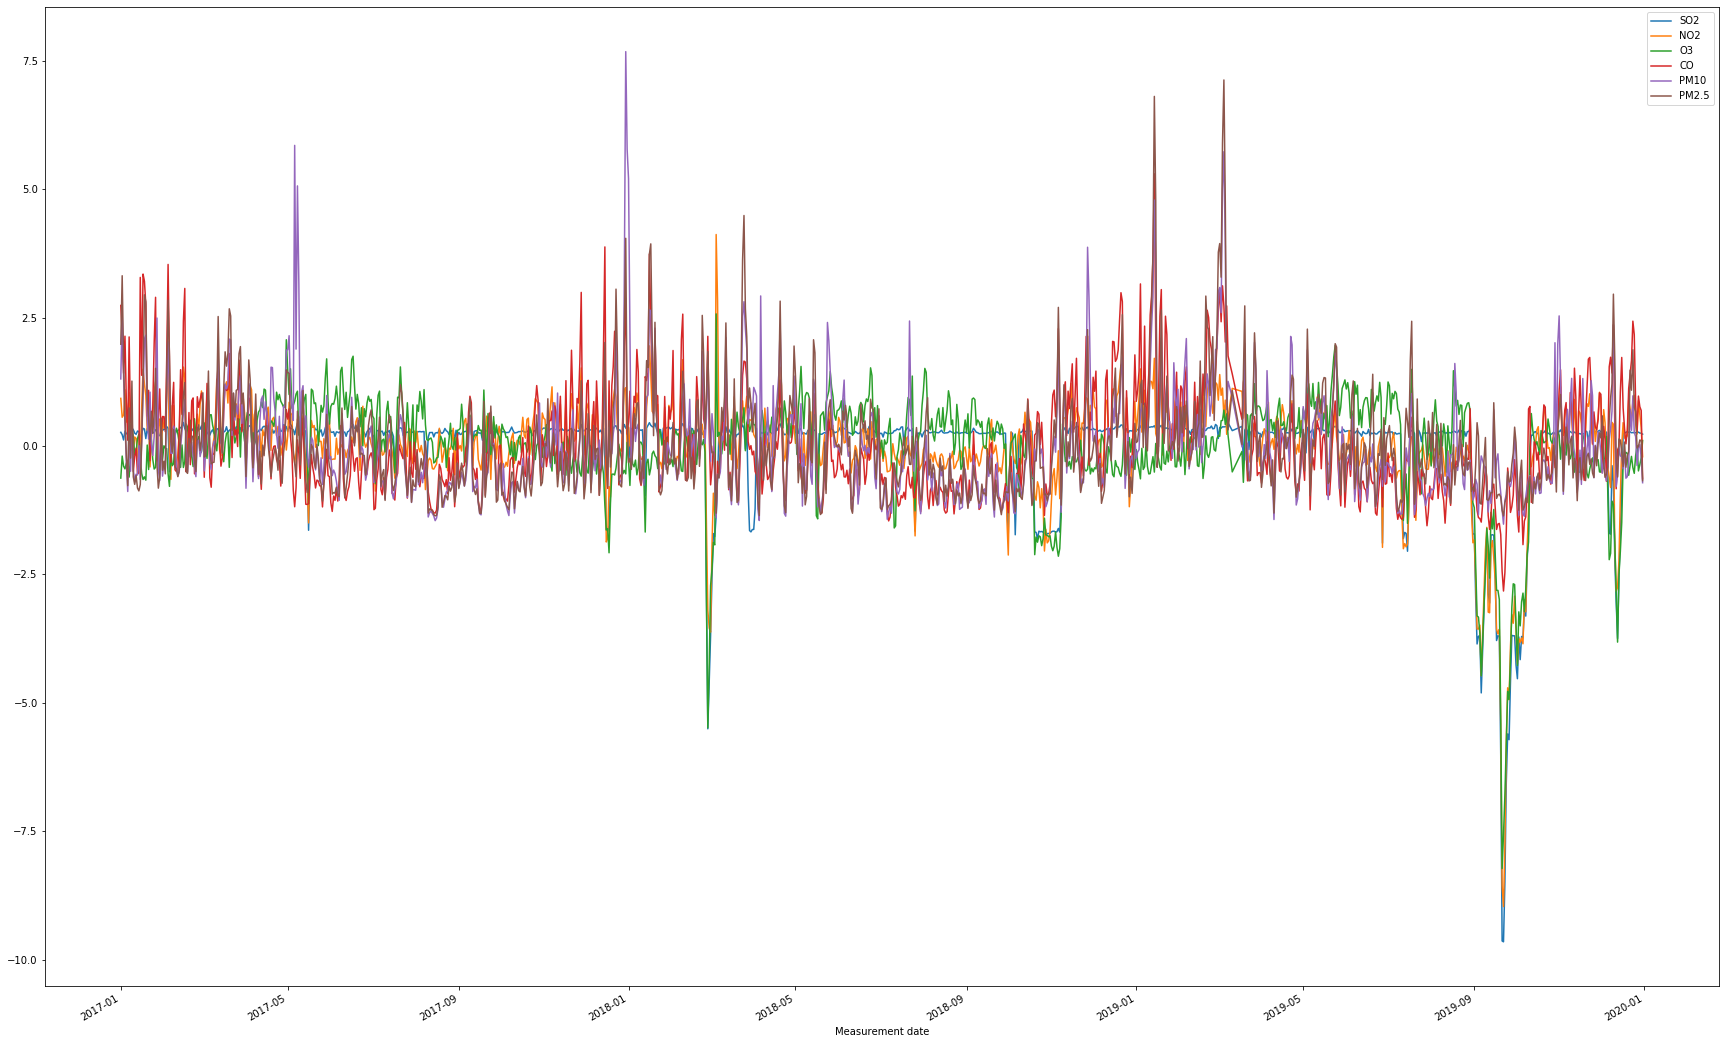

In [43]:
Q3_df5.plot(figsize = (30,20))

    B.	일간 오염물질 농도의 변화율을 구하고, 상관관계를 확인할 수 있도록 pair plot으로 도시하시오.

In [44]:
Q3_df5 = Q3_df3.pct_change()

In [45]:
Q3_df6 = Q3_df5.fillna(0)

In [46]:
Q3_df6

,SO2,NO2,O3,CO,PM10,PM2.5
Measurement date,,,,,,
2017-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-02,-0.253676,-0.196694,4.296570,-0.092175,0.415039,0.371037
2017-01-03,-0.777709,0.029385,-0.373540,-0.154263,-0.280994,-0.337944
2017-01-04,5.850416,0.318685,-0.158695,0.165377,-0.300204,-0.329884
2017-01-05,-0.242620,-0.305688,0.405685,-0.252893,-0.340570,-0.358060
...,...,...,...,...,...,...
2019-12-27,-0.014825,-0.139472,0.361731,-0.144285,-0.297264,-0.310683
2019-12-28,0.080583,0.556499,-0.673262,0.216831,0.258644,0.018509
2019-12-29,-0.100629,-0.150227,0.510513,-0.052917,0.037278,0.078746


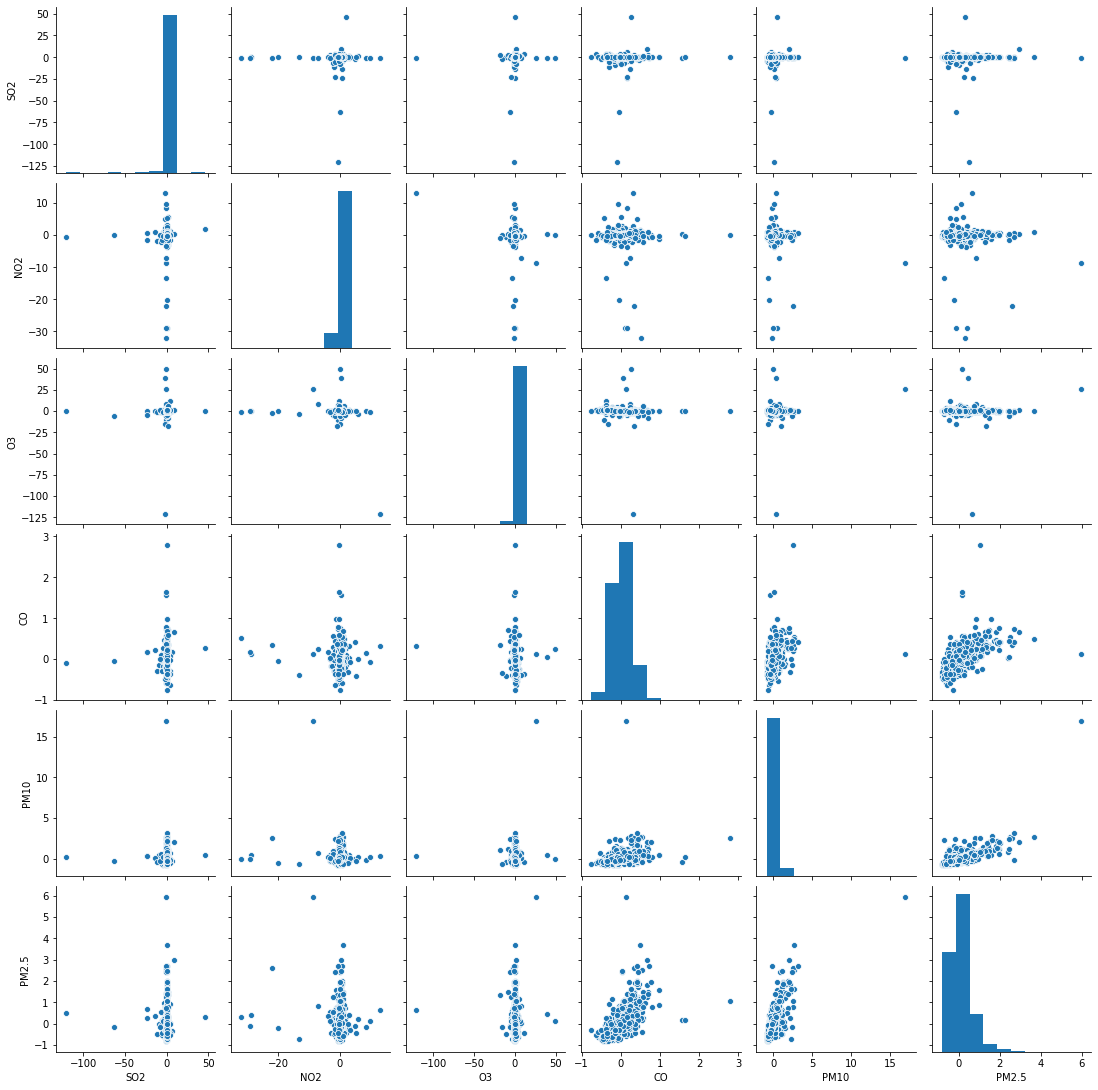

In [47]:
sns.pairplot(Q3_df6)

    C.	날짜별 오염농도를 10분위로 10등분하여 각각의 subgroup에 대해 평균 농도를 계산하고, 이를 막대그래프로 도시하시오. (1분위부터 10분위까지 각 그룹의 평균값)

In [48]:
Q3_C = Q3_df4.reset_index()

In [49]:
Q3_C

,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333
...,...,...,...,...,...,...,...
1080,2019-12-27,0.003433,0.028083,0.018195,0.556500,34.030000,24.853333
1081,2019-12-28,0.003710,0.043712,0.005945,0.677167,42.831667,25.313333
1082,2019-12-29,0.003337,0.037145,0.008980,0.641333,44.428333,27.306667
1083,2019-12-30,0.003272,0.031195,0.012347,0.628500,38.031667,27.060000


In [50]:
Q3_C['Cut_Date'] = pd.qcut(Q3_C['Measurement date'], 10, labels = False)

In [51]:
Q3_C.index = Q3_C.Cut_Date

In [52]:
Q3_C_2 = Q3_C.drop(['Measurement date', 'Cut_Date'], axis=1)

In [53]:
Q3_C_2.groupby(Q3_C_2.index).mean()

,SO2,NO2,O3,CO,PM10,PM2.5
Cut_Date,,,,,,
0,0.003906,0.034083,0.019912,0.618801,52.887798,32.617248
1,0.003170,0.023882,0.035307,0.429543,46.506543,22.919383
2,0.003390,0.025103,0.020124,0.464795,30.424954,16.682859
3,-0.002251,0.027786,0.007931,0.600395,52.736590,29.225710
4,0.001539,0.026853,0.030630,0.471531,48.178410,28.607339
5,0.001346,0.017135,0.023328,0.377954,25.803071,15.025340
6,-0.002650,0.028485,0.004550,0.651214,51.748355,30.063513
7,0.004150,0.031698,0.028040,0.575528,59.452988,35.968770
8,-0.006439,0.008693,0.021536,0.385672,30.673266,21.413159


In [54]:
Q3_C_3 = Q3_C_2.groupby(Q3_C_2.index).mean()

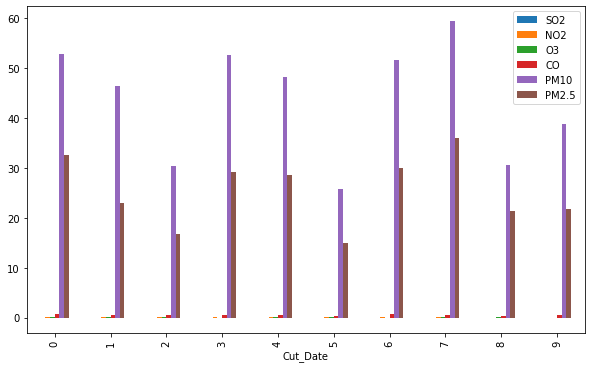

In [55]:
Q3_C_3.plot(kind='bar', figsize=(10,6))

### 4번
    오염물질의 계절성을 확인하기 위해 월별로 오염물질 농도 변화 추이를 분석하시오.

In [124]:
Q4 = Q3_df2.copy()

In [125]:
Q4['M'] = Q4.index.month

In [126]:
Q4_2 = Q4.groupby(Q4['M']).mean()

In [127]:
Q4_3 = Q4_2.apply(zscore)

In [128]:
Q4_3

,SO2,NO2,O3,CO,PM10,PM2.5
M,,,,,,
1,0.729087,1.077016,-0.457821,1.681441,1.262359,1.257811
2,0.358160,0.689012,-0.349845,1.156549,0.720441,0.893457
3,0.093273,0.888566,0.384937,0.675523,1.428306,1.996142
4,0.596639,0.593299,0.967748,-0.289804,0.537730,0.000285
5,0.623150,0.276680,1.440094,-0.516991,0.824575,0.133056
6,0.636001,-0.044439,1.506780,-0.851535,-0.471248,-0.151374
7,0.188108,-0.632942,0.353292,-1.113869,-1.100724,-0.627786
8,0.532790,-0.468208,0.669827,-1.107325,-1.369290,-1.219160
9,-2.895018,-2.619674,-1.724386,-1.172342,-1.380963,-1.333543


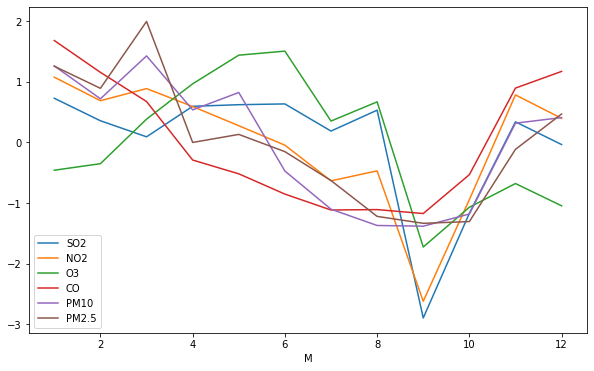

In [129]:
Q4_3.plot(figsize = (10, 6))

### 5번
    5.	시간대 별로 오염물질의 농도변화가 있는지 확인하시오.

In [130]:
Q5 = Q3_df2.copy()

In [131]:
Q5['T'] = Q5.index.hour

In [132]:
Q5_2 = Q5.groupby(Q5['T']).mean()

In [133]:
Q5_3 = Q5_2.apply(zscore)

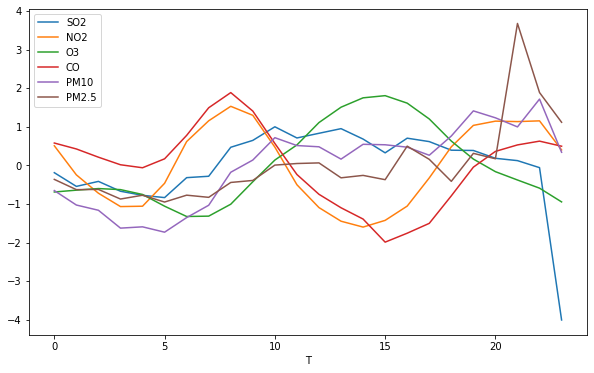

In [134]:
Q5_3.plot(figsize=(10,6))

### 6번
    6.	각 관측소 별로 오염물질 농도의 평균값이 통계적으로 유의한 수준의 차이가 있는지 분석하시오.

In [156]:
Q6_df = Q3_df.copy()

In [157]:
Q6_df.index = Q6_df['Station code']

In [179]:
Q6_df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
Station code,,,,,,,,,,,
101,2017-01-01 00:00,101,Jongno-gu,37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
101,2017-01-01 01:00,101,Jongno-gu,37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
101,2017-01-01 02:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
101,2017-01-01 03:00,101,Jongno-gu,37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
101,2017-01-01 04:00,101,Jongno-gu,37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
125,2019-12-31 19:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
125,2019-12-31 20:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
125,2019-12-31 21:00,125,Gangdong-gu,37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0


In [180]:
Q6_df_2 = Q6_df.drop(Q6_df.columns[0 : 5], axis = 'columns' )

In [181]:
Q6_df_2

,SO2,NO2,O3,CO,PM10,PM2.5
Station code,,,,,,
101,0.004,0.059,0.002,1.2,73.0,57.0
101,0.004,0.058,0.002,1.2,71.0,59.0
101,0.004,0.056,0.002,1.2,70.0,59.0
101,0.004,0.056,0.002,1.2,70.0,58.0
101,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...
125,0.003,0.028,0.013,0.5,23.0,17.0
125,0.003,0.025,0.015,0.4,25.0,19.0
125,0.003,0.023,0.015,0.4,24.0,17.0


In [190]:
Q6_df_3 = Q6_df_2.rename(columns = {'PM2.5' :'PM2_5'})

In [183]:
Station_list = Q6_df_2.index.to_list()

In [199]:
pollutant_list2 = Q6_df_3.columns.tolist()

In [200]:
pollutant_list2

['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2_5']

In [201]:
warnings.filterwarnings('ignore')

for pollutant in pollutant_list2 :
    model = ols('{} ~ C(Station_list)'.format(pollutant), Q6_df_3).fit()
    print(anova_lm(model))

                       df       sum_sq   mean_sq           F  PR(>F)
C(Station_list)      24.0    32.807567  1.366982  221.764624     0.0
Residual         647486.0  3991.176133  0.006164         NaN     NaN
                       df       sum_sq   mean_sq           F  PR(>F)
C(Station_list)      24.0    47.686712  1.986946  150.674093     0.0
Residual         647486.0  8538.428262  0.013187         NaN     NaN
                       df       sum_sq   mean_sq           F  PR(>F)
C(Station_list)      24.0    39.896103  1.662338  169.611433     0.0
Residual         647486.0  6345.918629  0.009801         NaN     NaN
                       df         sum_sq    mean_sq          F  PR(>F)
C(Station_list)      24.0    2347.599591  97.816650  608.82942     0.0
Residual         647486.0  104027.350054   0.160663        NaN     NaN
                       df        sum_sq        mean_sq           F  PR(>F)
C(Station_list)      24.0  1.729422e+07  720592.680481  143.145172     0.0
Residual        